## Capstone Project Notebook

# Finding an optimal location to open a coffee Shop in Brooklyn, New York City.
**Md Tanzil Hoque Chowdhury**  


## Table of contents
1. [Introduction / Business Problem](#introduction)
2. [Data Acquisition](#DataAcquisition)
3. [Methodology](#Methodology)
4. [Results](#Results)
5. [Discussion](#Discussion)
6. [Conclusion](#Conclusion)


## 1. Introduction / Business Problem <a name="introduction"></a>

The objective of this project is to analyze and select the best location in Brooklyn, New York City to open a new coffee shop. Searching for the optimal location is challenging as we need to consider many things before we open a coffee shop in a place. If the location is very saturated with other coffee shops, then it will not be a good idea to open a new coffee shop in that particular place as it will be a very tough competition with other coffee shops, which are already existed and popular in that area. Rather, we should choose an area where we can identify the demand of a coffee shop based on any available coffee shops and other popular venues. To address this business problem, research will be done using data science methodology and machine learning techniques such as clustering to find an optimal location for the coffee shop.

#### Import Library

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [9]:
! pip install requests

In [10]:
! pip install wget

  Stored in directory: C:\Users\TANZIL\AppData\Local\pip\Cache\wheels\40\15\30\7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


## 2. Data Acquisition <a name="DataAcquisition"></a>

To solve the business problem of finding the most suitable location in Brooklyn, New York city, we will need the following data:
* List of boroughs and neighborhoods in the city of New York
* List of zip codes for each neighborhood
* Latitude and longitude coordinates of those neighborhoods to plot maps and tie in venue data
* Information about different categories of venues such as restaurant cluster locations, whether a Coffee shop already exists or not.

#### Import Dataset

In [17]:
#!wget -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


#### Read Dataset

In [18]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

#### Show the data

In [19]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

#### Notice how all the relevant data is in the features key, which is basically a list of the neighborhoods

In [20]:
neighborhoods_data = newyork_data['features']
neighborhoods_data

[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

#### Showing neighborhoods_data

In [21]:
print(len(neighborhoods_data))
print(len(neighborhoods_data[0]))
neighborhoods_data[0]

306
5


{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

## 3. Methodology <a name="Methodology"></a>

The New York data is in a Json format. So, first we read the json data and found that all the relevant data is in the features key, which is basically a list of the neighborhoods. So, we extracted this important information from the features key. Then we converted the Jason data to pandas data frame. We found that the data frame has 5 boroughs and 306 neighborhoods. Then we used the geopy library to get the latitude and longitude values of New York City and visually represent it using the python folium library. We calculated the unique borough of New York city, and we chose the Brooklyn as this is the place of our interest. We checked the neighborhoods of the Brooklyn. We visualized Brooklyn and its neighborhoods and calculated the latitude and longitude of the Brooklyn. Then we used Foursquare to find all the neighborhoods and different venues in Brooklyn. 'Bay Ridge' neighborhood was selected and, we got the top venues that are in 'Bay Ridge' within a radius of 5000 meters using Foursquare. We sent the GET request and examine the results. We noticed that all the information is in the items key. We extracted information from the items key and convert into pandas data frame. We got the information of different venues and extracted the categories of different venues. We explored neighborhoods in Brooklyn and created a function to repeat the same process to all the neighborhoods in Brooklyn and checked how many venues were returned for each neighborhood. We calculated the unique venue categories and found that 288 unique venue categories. Each neighborhood was analyzed. We grouped rows by neighborhood and by taking the mean of the frequency of occurrence of each category and printed each neighborhood along with the top 5 most common venues. Then this information was put into a pandas data frame having 15 top venues in each neighborhood.  We ran k-means clustering technique to cluster the neighborhood into 3 different clusters. In each cluster we checked is there any coffee shop available in each neighborhood of the cluster or not. If there is no coffee shop in the neighborhoods of same cluster then we checked other categories related with coffee shop and based on this information we finally decided where to open the coffee shop.

#### Convert Neighborhood data into Pandas data frame

In [23]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [24]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

#### Print Neighborhood data

In [25]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [26]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [27]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [28]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### Unique Borough of New york city

In [29]:
neighborhoods['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

#### Checking the neighborhoods of Brooklyn

In [30]:
Brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
print(Brooklyn_data.shape)
Brooklyn_data.head()

(70, 4)


Borough Neighborhood   Latitude  Longitude
0  Brooklyn    Bay Ridge  40.625801 -74.030621
1  Brooklyn  Bensonhurst  40.611009 -73.995180
2  Brooklyn  Sunset Park  40.645103 -74.010316
3  Brooklyn   Greenpoint  40.730201 -73.954241
4  Brooklyn    Gravesend  40.595260 -73.973471

#### Visualizing Brooklyn and it's the neighborhoods.

In [31]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [32]:
# create map of Brooklyn using latitude and longitude values
map_Brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Brooklyn_data['Latitude'], Brooklyn_data['Longitude'], Brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Brooklyn)  
    
map_Brooklyn

#### Define Foursquare Credentials and Version

In [33]:
CLIENT_ID = 'AIM4IHE2EKM1QH3VTP2E1BIA3CK1BB1M4OWC441WQR1XEKTQ' # your Foursquare ID
CLIENT_SECRET = '0ZRMVQMS5V1NBOPPTA1GYM3X54OGBAB1APU0LQJRKBUMPXNP' # your Foursquare Secret
ACCESS_TOKEN = 'TD2IJU0O2AZCK32F25CLW1OLPCVRYRJ5OUQKXTNCB4IN4IO3' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AIM4IHE2EKM1QH3VTP2E1BIA3CK1BB1M4OWC441WQR1XEKTQ
CLIENT_SECRET:0ZRMVQMS5V1NBOPPTA1GYM3X54OGBAB1APU0LQJRKBUMPXNP


#### Get the neighborhood's name.

In [34]:
Brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

#### Getting the information of the neighborhood

In [35]:
neighborhood_latitude = Brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


#### Now, let's get the top venues that are in 'Bay Ridge' within a radius of 5000 meters.

In [76]:
# type your answer here
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=AIM4IHE2EKM1QH3VTP2E1BIA3CK1BB1M4OWC441WQR1XEKTQ&client_secret=0ZRMVQMS5V1NBOPPTA1GYM3X54OGBAB1APU0LQJRKBUMPXNP&v=20180605&ll=40.625801065010656,-74.03062069353813&radius=1000&limit=100'

#### Send the GET request and examine the resutls

In [77]:
import requests
results = requests.get(url).json()
results["response"]["groups"][0]['items'][0]["venue"]

{'id': '4b895827f964a5206c2d32e3',
 'name': 'Pilo Arts Day Spa and Salon',
 'location': {'address': '8412 3rd Ave',
  'lat': 40.62474788273414,
  'lng': -74.03059056940135,
  'labeledLatLngs': [{'label': 'display',
    'lat': 40.62474788273414,
    'lng': -74.03059056940135},
   {'label': 'entrance', 'lat': 40.624726, 'lng': -74.030697}],
  'distance': 117,
  'postalCode': '11209',
  'cc': 'US',
  'city': 'Brooklyn',
  'state': 'NY',
  'country': 'United States',
  'formattedAddress': ['8412 3rd Ave', 'Brooklyn, NY 11209', 'United States']},
 'categories': [{'id': '4bf58dd8d48988d1ed941735',
   'name': 'Spa',
   'pluralName': 'Spas',
   'shortName': 'Spa',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_',
    'suffix': '.png'},
   'primary': True}],
 'photos': {'count': 0, 'groups': []}}

#### we can see  that all the information is in the _items_ key. Let's extract informataion from the item key

In [78]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Now we are ready to clean the json and structure it into a _pandas_ dataframe.

In [79]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

    
nearby_venues.head()

reasons.count                                      reasons.items  \
0              0  [{'summary': 'This spot is popular', 'type': '...   
1              0  [{'summary': 'This spot is popular', 'type': '...   
2              0  [{'summary': 'This spot is popular', 'type': '...   
3              0  [{'summary': 'This spot is popular', 'type': '...   
4              0  [{'summary': 'This spot is popular', 'type': '...   

                       referralId  \
0  e-0-4b895827f964a5206c2d32e3-0   
1  e-0-4ad09cf7f964a520bed820e3-1   
2  e-0-4a343f1ef964a520f69b1fe3-2   
3  e-0-4abe4e84f964a520958c20e3-3   
4  e-0-57bf2b24498e2a2800681ed3-4   

                                    venue.categories venue.delivery.id  \
0  [{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...               NaN   
1  [{'id': '4bf58dd8d48988d179941735', 'name': 'B...            301119   
2  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...             66698   
3  [{'id': '4bf58dd8d48988d143941735', 'name': 'B...               NaN   
4  [{'id': '5293a7d53cf9994f4e043a45', 'name': 'C...           1024692   

          venue.delivery.provider.icon.name  \
0                                       NaN   
1  /delivery_provider_seamless_20180129.png   
2  /delivery_provider_seamless_20180129.png   
3                                       NaN   
4  /delivery_provider_seamless_20180129.png   

        venue.delivery.provider.icon.prefix  \
0                                       NaN   
1  https://fastly.4sqi.net/img/general/cap/   
2  https://fastly.4sqi.net/img/general/cap/   
3                                       NaN   
4  https://fastly.4sqi.net/img/general/cap/   

  venue.delivery.provider.icon.sizes venue.delivery.provider.name  \
0                                NaN                          NaN   
1                           [40, 50]                     seamless   
2                           [40, 50]                     seamless   
3                                NaN                          NaN   
4                           [40, 50]                     seamless   

                                  venue.delivery.url  \
0                                                NaN   
1  https://www.seamless.com/menu/bagel-boy-8002-3...   
2  https://www.seamless.com/menu/leos-casa-calama...   
3                                                NaN   
4  https://www.seamless.com/menu/georgian-cuisine...   

                   venue.id venue.location.address venue.location.cc  \
0  4b895827f964a5206c2d32e3           8412 3rd Ave                US   
1  4ad09cf7f964a520bed820e3           8002 3rd Ave                US   
2  4a343f1ef964a520f69b1fe3           8602 3rd Ave                US   
3  4abe4e84f964a520958c20e3           8610 3rd Ave                US   
4  57bf2b24498e2a2800681ed3           8309 3rd Ave                US   

  venue.location.city venue.location.country venue.location.crossStreet  \
0            Brooklyn          United States                        NaN   
1            Brooklyn          United States                    80th St   
2            Brooklyn          United States                   at 86 St   
3            Brooklyn          United States            btw 86th & 87th   
4            Brooklyn          United States                        NaN   

   venue.location.distance                    venue.location.formattedAddress  \
0                      117  [8412 3rd Ave, Brooklyn, NY 11209, United States]   
1                      257  [8002 3rd Ave (80th St), Brooklyn, NY 11209, U...   
2                      180  [8602 3rd Ave (at 86 St), Brooklyn, NY 11209, ...   
3                      296  [8610 3rd Ave (btw 86th & 87th), Brooklyn, NY ...   
4                       43  [8309 3rd Ave, Brooklyn, NY 11209, United States]   

                       venue.location.labeledLatLngs  venue.location.lat  \
0  [{'label': 'display', 'lat': 40.62474788273414...           40.624748   
1  [{'label': 'display', 'lat': 40.627896, 'lng':...           40.6

In [80]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

venue.name  \
0     Pilo Arts Day Spa and Salon   
1                       Bagel Boy   
2             Leo's Casa Calamari   
3                    Pegasus Cafe   
4  Georgian Dream Cafe and Bakery   

                                    venue.categories  venue.location.lat  \
0  [{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...           40.624748   
1  [{'id': '4bf58dd8d48988d179941735', 'name': 'B...           40.627896   
2  [{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...           40.624200   
3  [{'id': '4bf58dd8d48988d143941735', 'name': 'B...           40.623168   
4  [{'id': '5293a7d53cf9994f4e043a45', 'name': 'C...           40.625586   

   venue.location.lng  
0          -74.030591  
1          -74.029335  
2          -74.030931  
3          -74.031186  
4          -74.030196

#### Get the information of different venues

In [81]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name            categories        lat        lng
0     Pilo Arts Day Spa and Salon                   Spa  40.624748 -74.030591
1                       Bagel Boy            Bagel Shop  40.627896 -74.029335
2             Leo's Casa Calamari           Pizza Place  40.624200 -74.030931
3                    Pegasus Cafe        Breakfast Spot  40.623168 -74.031186
4  Georgian Dream Cafe and Bakery  Caucasian Restaurant  40.625586 -74.030196

#### Extracting the categories of different venues

In [82]:
print(nearby_venues["categories"].unique())
nearby_venues.shape

['Spa' 'Bagel Shop' 'Pizza Place' 'Breakfast Spot' 'Caucasian Restaurant'
 'Taco Place' 'Greek Restaurant' 'Middle Eastern Restaurant' 'Tea Room'
 'Italian Restaurant' 'Cosmetics Shop' 'Bookstore' 'Cupcake Shop'
 'American Restaurant' 'Hookah Bar' 'Grocery Store' 'Turkish Restaurant'
 'Sandwich Place' 'Frozen Yogurt Shop' 'Bakery' 'Sports Bar'
 'Thai Restaurant' 'Chinese Restaurant' 'Bar' 'Department Store'
 'Asian Restaurant' 'Snack Place' 'Ice Cream Shop' 'Lebanese Restaurant'
 'Diner' 'Video Game Store' 'Wine Bar' 'Kids Store' 'Indian Restaurant'
 'Supplement Shop' 'Coffee Shop' 'Mobile Phone Shop' 'Lingerie Store'
 'Mattress Store' 'Park' 'Toy / Game Store' 'Pub' 'Gym' 'Irish Pub'
 'Sushi Restaurant' 'New American Restaurant' 'Noodle House'
 'Japanese Restaurant' "Women's Store" 'Café' 'Beer Garden'
 'Weight Loss Center' 'Shipping Store' 'Pharmacy' 'Bubble Tea Shop'
 'Vegetarian / Vegan Restaurant' 'Juice Bar']


(100, 4)

In [83]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### Explore Neighborhoods in Brooklyn and let's create a function to repeat the same process to all the neighborhoods in Brooklyn

In [84]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    #print("venue list: ", venues_list)
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    print("Near by venues: ", nearby_venues)
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [85]:
# type your answer here
Brooklyn_venues = getNearbyVenues(names=Brooklyn_data['Neighborhood'],
                                   latitudes=Brooklyn_data['Latitude'],
                                   longitudes=Brooklyn_data['Longitude']
                                  )

Near by venues:                                0          1          2  \
0                     Bay Ridge  40.625801 -74.030621   
1                     Bay Ridge  40.625801 -74.030621   
2                     Bay Ridge  40.625801 -74.030621   
3                     Bay Ridge  40.625801 -74.030621   
4                     Bay Ridge  40.625801 -74.030621   
5                     Bay Ridge  40.625801 -74.030621   
6                     Bay Ridge  40.625801 -74.030621   
7                     Bay Ridge  40.625801 -74.030621   
8                     Bay Ridge  40.625801 -74.030621   
9                     Bay Ridge  40.625801 -74.030621   
10                    Bay Ridge  40.625801 -74.030621   
11                    Bay Ridge  40.625801 -74.030621   
12                    Bay Ridge  40.625801 -74.030621   
13                    Bay Ridge  40.625801 -74.030621   
14                    Bay Ridge  40.625801 -74.030621   
15                    Bay Ridge  40.625801 -74.030621   
16            

In [86]:
print(Brooklyn_venues.shape)
Brooklyn_venues.head()

(2519, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Bay Ridge              40.625801              -74.030621   
1    Bay Ridge              40.625801              -74.030621   
2    Bay Ridge              40.625801              -74.030621   
3    Bay Ridge              40.625801              -74.030621   
4    Bay Ridge              40.625801              -74.030621   

                            Venue  Venue Latitude  Venue Longitude  \
0     Pilo Arts Day Spa and Salon       40.624748       -74.030591   
1                       Bagel Boy       40.627896       -74.029335   
2             Leo's Casa Calamari       40.624200       -74.030931   
3  Georgian Dream Cafe and Bakery       40.625586       -74.030196   
4                    Pegasus Cafe       40.623168       -74.031186   

         Venue Category  
0                   Spa  
1            Bagel Shop  
2           Pizza Place  
3  Caucasian Restaurant  
4        Breakfast Spot

#### Let's check how many venues were returned for each neighborhood


In [87]:
Brooklyn_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Bath Beach                                    41                      41   
Bay Ridge                                     74                      74   
Bedford Stuyvesant                            25                      25   
Bensonhurst                                   32                      32   
Bergen Beach                                   8                       8   
Boerum Hill                                   85                      85   
Borough Park                                  17                      17   
Brighton Beach                                40                      40   
Broadway Junction                             16                      16   
Brooklyn Heights                             100                     100   
Brownsville                                   18                      18   
Bushwick                                      64                      64   
Canarsie                                       7                       7   
Carroll Gardens                              100                     100   
City Line                                     32                      32   
Clinton Hill                                  88                      88   
Cobble Hill                                   87                      87   
Coney Island                                  15                      15   
Crown Heights                                 22                      22   
Cypress Hills                                 27                      27   
Ditmas Park                                   51                      51   
Downtown                                      91                      91   
Dumbo                                         52                      52   
Dyker Heights                                  5                       5   
East Flatbush                                 12                      12   
East New York                                 10                      10   
East Williamsburg                             54                      54   
Erasmus                                       21                      21   
Flatbush                                      20                      20   
Flatlands                                     18                      18   
Fort Greene                                   49                      49   
Fort Hamilton                                 52                      52   
Fulton Ferry                                  53                      53   
Georgetown                                    29                      29   
Gerritsen Beach                               20                      20   
Gowanus                                       54                      54   
Gravesend                                     30                      30   
Greenpoint                                    85                      85   
Highland Park                                 15                      15   
Homecrest                                     41                      41   
Kensington                                    26                      26   
Madison                                       10                      10   
Manhattan Beach                                9                       9   
Manhattan Terrace                             20                      20   
Marine Park                                    8                       8   
Midwood                                       10                      10   
Mill Basin                                    31                      31   
Mill Island                                    2                       2   
New Lots                                      17                      17   
North Side                                   100                     100   
Ocean Hill                                    25                      25   

In [88]:
Brooklyn_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Bath Beach                                    41                      41   
Bay Ridge                                     74                      74   
Bedford Stuyvesant                            25                      25   
Bensonhurst                                   32                      32   
Bergen Beach                                   8                       8   
Boerum Hill                                   85                      85   
Borough Park                                  17                      17   
Brighton Beach                                40                      40   
Broadway Junction                             16                      16   
Brooklyn Heights                             100                     100   
Brownsville                                   18                      18   
Bushwick                                      64                      64   
Canarsie                                       7                       7   
Carroll Gardens                              100                     100   
City Line                                     32                      32   
Clinton Hill                                  88                      88   
Cobble Hill                                   87                      87   
Coney Island                                  15                      15   
Crown Heights                                 22                      22   
Cypress Hills                                 27                      27   
Ditmas Park                                   51                      51   
Downtown                                      91                      91   
Dumbo                                         52                      52   
Dyker Heights                                  5                       5   
East Flatbush                                 12                      12   
East New York                                 10                      10   
East Williamsburg                             54                      54   
Erasmus                                       21                      21   
Flatbush                                      20                      20   
Flatlands                                     18                      18   
Fort Greene                                   49                      49   
Fort Hamilton                                 52                      52   
Fulton Ferry                                  53                      53   
Georgetown                                    29                      29   
Gerritsen Beach                               20                      20   
Gowanus                                       54                      54   
Gravesend                                     30                      30   
Greenpoint                                    85                      85   
Highland Park                                 15                      15   
Homecrest                                     41                      41   
Kensington                                    26                      26   
Madison                                       10                      10   
Manhattan Beach                                9                       9   
Manhattan Terrace                             20                      20   
Marine Park                                    8                       8   
Midwood                                       10                      10   
Mill Basin                                    31                      31   
Mill Island                                    2                       2   
New Lots                                      17                      17   
North Side                                   100                     100   
Ocean Hill                                    25                      25   

#### Calculating the unique venue categories

In [89]:
print('There are total {} different categories for venue.'.format(len(Brooklyn_venues['Venue Category'].unique())))
print(Brooklyn_venues['Venue Category'].unique())
Brooklyn_venues.shape

There are total 288 different categories for venue.
['Spa' 'Bagel Shop' 'Pizza Place' 'Caucasian Restaurant' 'Breakfast Spot'
 'Taco Place' 'Greek Restaurant' 'Bookstore' 'Middle Eastern Restaurant'
 'Italian Restaurant' 'Tea Room' 'Grocery Store' 'Hookah Bar' 'Sports Bar'
 'American Restaurant' 'Thai Restaurant' 'Ice Cream Shop' 'Bar'
 'Sandwich Place' 'Sushi Restaurant' 'Cosmetics Shop' 'Mattress Store'
 'Department Store' 'Snack Place' 'Café' 'Indian Restaurant' 'Kids Store'
 'Video Game Store' 'Toy / Game Store' 'Lingerie Store' 'Supplement Shop'
 'Juice Bar' 'Pharmacy' 'New American Restaurant' 'Seafood Restaurant'
 'Dim Sum Restaurant' 'Chinese Restaurant' 'Vietnamese Restaurant'
 'Pool Hall' 'Clothing Store' 'Mexican Restaurant' 'Supermarket' 'Hotel'
 'Mediterranean Restaurant' 'Furniture / Home Store' 'Electronics Store'
 'Playground' 'Park' 'Hotpot Restaurant' 'Noodle House' 'Donut Shop'
 'Pet Store' 'Dessert Shop' 'IT Services' 'Smoke Shop'
 'Shabu-Shabu Restaurant' 'Coffee S

(2519, 7)

#### Analyze Each Neighborhood

In [90]:
# one hot encoding
Brooklyn_onehot = pd.get_dummies(Brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")
print(Brooklyn_onehot.shape)
Brooklyn_onehot.head()

(2519, 288)


ATM  American Restaurant  Animal Shelter  Antique Shop  Arepa Restaurant  \
0    0                    0               0             0                 0   
1    0                    0               0             0                 0   
2    0                    0               0             0                 0   
3    0                    0               0             0                 0   
4    0                    0               0             0                 0   

   Argentinian Restaurant  Art Gallery  Arts & Crafts Store  \
0                       0            0                    0   
1                       0            0                    0   
2                       0            0                    0   
3                       0            0                    0   
4                       0            0                    0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                     0                 0                   0            0   
1                     0                 0                   0            0   
2                     0                 0                   0            0   
3                     0                 0                   0            0   
4                     0                 0                   0            0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0          0           0       0     0    0               0                 0   
1          0           1       0     0    0               0                 0   
2          0           0       0     0    0               0                 0   
3          0           0       0     0    0               0                 0   
4          0           0       0     0    0               0                 0   

   Basketball Court  Beach  Beer Bar  Beer Garden  Beer Store  Bike Shop  \
0                 0      0         0            0           0          0   
1                 0      0         0            0           0          0   
2                 0      0         0            0           0          0   
3                 0      0         0            0           0          0   
4                 0      0         0            0           0          0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  Boxing Gym  \
0       0           0              0          0         0           0   
1       0           0              0          0         0           0   
2       0           0              0          0         0           0   
3       0           0              0          0         0           0   
4       0           0              0          0         0           0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  \
0                     0               0        0       0                0   
1                     0               0        0       0                0   
2                     0               0        0       0                0   
3                     0               0        0       0                0   
4                     0               1        0       0                0   

   Buffet  Burger Joint  Burmese Restaurant  Burrito Place  Bus Line  \
0       0             0                   0              0         0   
1       0             0                   0              0         0   
2       0             0                   0              0         0   
3       0             0                   0              0         0   
4       0             0                   0              0         0   

   Bus Station  Bus Stop  Business Service  Butcher  Café  \
0            0         0                 0        0     0   
1            0         0                 0        0     0   
2            0         0                 0        0     0   
3            0         0                 0        0     0   
4            0         0                 0        0     0   

   Cajun / Creole Restaurant  Cand

In [91]:
Brooklyn_onehot.insert(0, "Neighborhoods", Brooklyn_venues["Neighborhood"])

In [92]:
#### let's examine the new dataframe size.

In [93]:
print(Brooklyn_onehot.shape)
Brooklyn_onehot.head()

(2519, 289)


Neighborhoods  ATM  American Restaurant  Animal Shelter  Antique Shop  \
0     Bay Ridge    0                    0               0             0   
1     Bay Ridge    0                    0               0             0   
2     Bay Ridge    0                    0               0             0   
3     Bay Ridge    0                    0               0             0   
4     Bay Ridge    0                    0               0             0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Arts & Crafts Store  \
0                 0                       0            0                    0   
1                 0                       0            0                    0   
2                 0                       0            0                    0   
3                 0                       0            0                    0   
4                 0                       0            0                    0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                     0                 0                   0            0   
1                     0                 0                   0            0   
2                     0                 0                   0            0   
3                     0                 0                   0            0   
4                     0                 0                   0            0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0          0           0       0     0    0               0                 0   
1          0           1       0     0    0               0                 0   
2          0           0       0     0    0               0                 0   
3          0           0       0     0    0               0                 0   
4          0           0       0     0    0               0                 0   

   Basketball Court  Beach  Beer Bar  Beer Garden  Beer Store  Bike Shop  \
0                 0      0         0            0           0          0   
1                 0      0         0            0           0          0   
2                 0      0         0            0           0          0   
3                 0      0         0            0           0          0   
4                 0      0         0            0           0          0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  Boxing Gym  \
0       0           0              0          0         0           0   
1       0           0              0          0         0           0   
2       0           0              0          0         0           0   
3       0           0              0          0         0           0   
4       0           0              0          0         0           0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  \
0                     0               0        0       0                0   
1                     0               0        0       0                0   
2                     0               0        0       0                0   
3                     0               0        0       0                0   
4                     0               1        0       0                0   

   Buffet  Burger Joint  Burmese Restaurant  Burrito Place  Bus Line  \
0       0             0                   0              0         0   
1       0             0                   0              0         0   
2       0             0                   0              0         0   
3       0             0                   0              0         0   
4       0             0                   0              0         0   

   Bus Station  Bus Stop  Business Service  Butcher  Café  \
0            0         0                 0        0     0   
1            0         0                 0        0     0   
2            0         0                 0        0     0   
3            0         0                 0        0     0   
4          

In [94]:
Brooklyn_onehot.columns

Index(['Neighborhoods', 'ATM', 'American Restaurant', 'Animal Shelter',
       'Antique Shop', 'Arepa Restaurant', 'Argentinian Restaurant',
       'Art Gallery', 'Arts & Crafts Store', 'Arts & Entertainment',
       ...
       'Video Store', 'Vietnamese Restaurant', 'Waterfront', 'Whisky Bar',
       'Wine Bar', 'Wine Shop', 'Wings Joint', 'Women's Store',
       'Yemeni Restaurant', 'Yoga Studio'],
      dtype='object', length=289)

#### let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [95]:
Brooklyn_grouped = Brooklyn_onehot.groupby('Neighborhoods').mean().reset_index()
Brooklyn_grouped

Neighborhoods       ATM  American Restaurant  Animal Shelter  \
0                  Bath Beach  0.000000             0.000000            0.00   
1                   Bay Ridge  0.000000             0.040541            0.00   
2          Bedford Stuyvesant  0.000000             0.000000            0.00   
3                 Bensonhurst  0.000000             0.000000            0.00   
4                Bergen Beach  0.000000             0.000000            0.00   
5                 Boerum Hill  0.000000             0.000000            0.00   
6                Borough Park  0.000000             0.058824            0.00   
7              Brighton Beach  0.000000             0.000000            0.00   
8           Broadway Junction  0.000000             0.000000            0.00   
9            Brooklyn Heights  0.000000             0.010000            0.00   
10                Brownsville  0.000000             0.000000            0.00   
11                   Bushwick  0.000000             0.015625            0.00   
12                   Canarsie  0.000000             0.000000            0.00   
13            Carroll Gardens  0.000000             0.010000            0.00   
14                  City Line  0.000000             0.000000            0.00   
15               Clinton Hill  0.000000             0.000000            0.00   
16                Cobble Hill  0.000000             0.011494            0.00   
17               Coney Island  0.000000             0.000000            0.00   
18              Crown Heights  0.000000             0.000000            0.00   
19              Cypress Hills  0.000000             0.000000            0.00   
20                Ditmas Park  0.000000             0.000000            0.00   
21                   Downtown  0.000000             0.021978            0.00   
22                      Dumbo  0.000000             0.019231            0.00   
23              Dyker Heights  0.000000             0.000000            0.00   
24              East Flatbush  0.083333             0.000000            0.00   
25              East New York  0.000000             0.000000            0.00   
26          East Williamsburg  0.000000             0.000000            0.00   
27                    Erasmus  0.000000             0.000000            0.00   
28                   Flatbush  0.000000             0.000000            0.00   
29                  Flatlands  0.000000             0.000000            0.00   
30                Fort Greene  0.000000             0.000000            0.00   
31              Fort Hamilton  0.000000             0.019231            0.00   
32               Fulton Ferry  0.000000             0.037736            0.00   
33                 Georgetown  0.000000             0.034483            0.00   
34            Gerritsen Beach  0.000000             0.000000            0.00   
35                    Gowanus  0.000000             0.018519            0.00   
36                  Gravesend  0.000000             0.000000            0.00   
37                 Greenpoint  0.000000             0.023529            0.00   
38              Highland Park  0.000000             0.000000            0.00   
39                  Homecrest  0.000000             0.024390            0.00   
40                 Kensington  0.000000             0.000000            0.00   
41                    Madison  0.000000             0.000000            0.00   
42            Manhattan Beach  0.000000             0.000000            0.00   
43          Manhattan Terrace  0.000000             0.000000            0.00   
44                Marine Park  0.000000             0.000000            0.00   
45                    Midwood  0.000000             0.000000            0.00   
46                 Mill Basin  0.000000             0.032258            0.00   
47                Mill Island  0.000000             0.000000            0.00   
48                   New Lots  0.000000             0.000000            0.00   
49              

In [96]:
Brooklyn_grouped[Brooklyn_grouped['Neighborhoods'] =='Bay Ridge'].T.reset_index().head()

index          1
0        Neighborhoods  Bay Ridge
1                  ATM          0
2  American Restaurant  0.0405405
3       Animal Shelter          0
4         Antique Shop          0

#### Let's print each neighborhood along with the top 5 most common venues

In [97]:
num_top_venues = 5

for hood in Brooklyn_grouped['Neighborhoods']:
    print("----"+hood+"----")
    temp = Brooklyn_grouped[Brooklyn_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:,:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
              venue  freq
0          Pharmacy  0.10
1        Donut Shop  0.05
2  Sushi Restaurant  0.05
3   Bubble Tea Shop  0.05
4       Pizza Place  0.05


----Bay Ridge----
                 venue  freq
0          Pizza Place  0.07
1                  Spa  0.05
2   Italian Restaurant  0.05
3     Greek Restaurant  0.04
4  American Restaurant  0.04


----Bedford Stuyvesant----
           venue  freq
0    Pizza Place  0.12
1            Bar  0.12
2           Café  0.08
3    Coffee Shop  0.08
4  Grocery Store  0.04


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.16
1         Pizza Place  0.12
2          Donut Shop  0.06
3  Italian Restaurant  0.06
4    Sushi Restaurant  0.06


----Bergen Beach----
                venue  freq
0     Harbor / Marina  0.25
1      Rental Service  0.12
2  Athletics & Sports  0.12
3                Park  0.12
4      Baseball Field  0.12


----Boerum Hill----
                 venue  freq
0          Coffee Shop  0.07
1  

                venue  freq
0                 Gym   0.2
1            Bus Line   0.2
2                Food   0.2
3  Child Care Service   0.2
4         Auto Garage   0.2


----Park Slope----
                 venue  freq
0          Coffee Shop  0.12
1      Thai Restaurant  0.04
2          Pizza Place  0.04
3                  Spa  0.04
4  Japanese Restaurant  0.04


----Prospect Heights----
                     venue  freq
0       Mexican Restaurant  0.06
1                      Bar  0.06
2             Cocktail Bar  0.05
3                     Café  0.03
4  New American Restaurant  0.03


----Prospect Lefferts Gardens----
                  venue  freq
0                  Café  0.12
1           Pizza Place  0.07
2  Caribbean Restaurant  0.07
3         Deli / Bodega  0.07
4     Indian Restaurant  0.05


----Prospect Park South----
                  venue  freq
0  Caribbean Restaurant  0.07
1  Fast Food Restaurant  0.07
2     Mobile Phone Shop  0.07
3      Department Store  0.07
4         Grocer

In [98]:
print(Brooklyn_venues['Venue Category'].value_counts())

Pizza Place                                 126
Coffee Shop                                  78
Bar                                          71
Italian Restaurant                           62
Deli / Bodega                                61
Pharmacy                                     52
Bakery                                       52
Chinese Restaurant                           51
Grocery Store                                51
Sandwich Place                               47
Bank                                         44
Café                                         42
Donut Shop                                   42
Ice Cream Shop                               42
Mexican Restaurant                           42
Park                                         38
Cocktail Bar                                 37
Bagel Shop                                   37
Caribbean Restaurant                         36
American Restaurant                          36
Fried Chicken Joint                     

In [150]:
print(Brooklyn_venues['Venue Category'].value_counts().head())

Pizza Place           126
Coffee Shop            78
Bar                    71
Italian Restaurant     62
Deli / Bodega          61
Name: Venue Category, dtype: int64


In [99]:
Brooklyn_grouped.insert(1, "Coffee Shop Exists", Brooklyn_grouped["Coffee Shop"]> 0)



In [100]:
# Verify
print(Brooklyn_grouped.shape)
Brooklyn_grouped

(70, 290)


Neighborhoods  Coffee Shop Exists       ATM  \
0                  Bath Beach                True  0.000000   
1                   Bay Ridge               False  0.000000   
2          Bedford Stuyvesant                True  0.000000   
3                 Bensonhurst                True  0.000000   
4                Bergen Beach               False  0.000000   
5                 Boerum Hill                True  0.000000   
6                Borough Park                True  0.000000   
7              Brighton Beach                True  0.000000   
8           Broadway Junction               False  0.000000   
9            Brooklyn Heights                True  0.000000   
10                Brownsville               False  0.000000   
11                   Bushwick                True  0.000000   
12                   Canarsie               False  0.000000   
13            Carroll Gardens                True  0.000000   
14                  City Line               False  0.000000   
15               Clinton Hill               False  0.000000   
16                Cobble Hill                True  0.000000   
17               Coney Island               False  0.000000   
18              Crown Heights                True  0.000000   
19              Cypress Hills                True  0.000000   
20                Ditmas Park                True  0.000000   
21                   Downtown                True  0.000000   
22                      Dumbo                True  0.000000   
23              Dyker Heights               False  0.000000   
24              East Flatbush               False  0.083333   
25              East New York               False  0.000000   
26          East Williamsburg                True  0.000000   
27                    Erasmus               False  0.000000   
28                   Flatbush                True  0.000000   
29                  Flatlands               False  0.000000   
30                Fort Greene                True  0.000000   
31              Fort Hamilton               False  0.000000   
32               Fulton Ferry                True  0.000000   
33                 Georgetown                True  0.000000   
34            Gerritsen Beach               False  0.000000   
35                    Gowanus                True  0.000000   
36                  Gravesend               False  0.000000   
37                 Greenpoint                True  0.000000   
38              Highland Park               False  0.000000   
39                  Homecrest               False  0.000000   
40                 Kensington               False  0.000000   
41                    Madison               False  0.000000   
42            Manhattan Beach               False  0.000000   
43          Manhattan Terrace               False  0.000000   
44                Marine Park               False  0.000000   
45                    Midwood               False  0.000000   
46                 Mill Basin               False  0.000000   
47                Mill Island               False  0.000000   
48                   New Lots               False  0.000000   
49                 North Side                True  0.000000   
50                 Ocean Hill                True  0.000000   
51              Ocean Parkway               False  0.000000   
52            Paerdegat Basin               False  0.000000   
53                 Park Slope                True  0.000000   
54           Prospect Heights                True  0.000000   
55  Prospect Lefferts Gardens               False  0.000000   
56        Prospect Park South               False  0.000000   
57                   Red Hook               False  0.000000   
58             Remsen Village               False  0.000000   
59                      Rugby               False  0.000000   
60                   Sea Gate               False  0.000000   
61             Sheepshead Bay               False  0.000000   
62                 South Side                Tr

#### Let's put that into a pandas dataframe.

In [101]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
num_top_venues = 15

# create columns according to number of top venues
columns = ['Neighborhoods','Coffee Shop Exists']
for ind in np.arange(num_top_venues):
    #print("ind-->",ind)
    columns.append('Rank {}'.format(ind+1))
  

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = Brooklyn_grouped['Neighborhoods']
neighborhoods_venues_sorted['Coffee Shop Exists'] = Brooklyn_grouped['Coffee Shop Exists']

for ind in np.arange(Brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(Brooklyn_grouped.iloc[ind, 2:], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhoods  Coffee Shop Exists              Rank 1  \
0          Bath Beach                True            Pharmacy   
1           Bay Ridge               False         Pizza Place   
2  Bedford Stuyvesant                True                 Bar   
3         Bensonhurst                True  Chinese Restaurant   
4        Bergen Beach               False     Harbor / Marina   

             Rank 2              Rank 3              Rank 4  \
0  Sushi Restaurant  Chinese Restaurant          Donut Shop   
1               Spa  Italian Restaurant    Greek Restaurant   
2       Pizza Place                Café         Coffee Shop   
3       Pizza Place      Ice Cream Shop  Italian Restaurant   
4              Park      Rental Service      Baseball Field   

                    Rank 5              Rank 6                Rank 7  \
0          Bubble Tea Shop         Gas Station  Fast Food Restaurant   
1       Chinese Restaurant                 Bar         Grocery Store   
2  New American Restaurant       Grocery Store              Boutique   
3         Sushi Restaurant          Donut Shop         Grocery Store   
4               Playground  Athletics & Sports          Hockey Field   

                   Rank 8                  Rank 9              Rank 10  \
0             Pizza Place              Poke Place  Peruvian Restaurant   
1              Bagel Shop          Clothing Store           Playground   
2  Thrift / Vintage Store                    Park         Gourmet Shop   
3             Record Shop  Shabu-Shabu Restaurant    Hotpot Restaurant   
4             Flower Shop     Filipino Restaurant    Fish & Chips Shop   

              Rank 11                    Rank 12              Rank 13  \
0     Supplement Shop                  Surf Spot       Clothing Store   
1  Mexican Restaurant  Middle Eastern Restaurant       Sandwich Place   
2           Gift Shop                 Bagel Shop  Fried Chicken Joint   
3      Cosmetics Shop                       Park            Pet Store   
4         Fish Market               Fishing Spot          Yoga Studio   

               Rank 14             Rank 15  
0          Coffee Shop   German Restaurant  
1           Hookah Bar           Bookstore  
2  Japanese Restaurant  Italian Restaurant  
3         Noodle House         Coffee Shop  
4                 Food               Field

In [103]:
Brooklyn_grouped

Neighborhoods  Coffee Shop Exists       ATM  \
0                  Bath Beach                True  0.000000   
1                   Bay Ridge               False  0.000000   
2          Bedford Stuyvesant                True  0.000000   
3                 Bensonhurst                True  0.000000   
4                Bergen Beach               False  0.000000   
5                 Boerum Hill                True  0.000000   
6                Borough Park                True  0.000000   
7              Brighton Beach                True  0.000000   
8           Broadway Junction               False  0.000000   
9            Brooklyn Heights                True  0.000000   
10                Brownsville               False  0.000000   
11                   Bushwick                True  0.000000   
12                   Canarsie               False  0.000000   
13            Carroll Gardens                True  0.000000   
14                  City Line               False  0.000000   
15               Clinton Hill               False  0.000000   
16                Cobble Hill                True  0.000000   
17               Coney Island               False  0.000000   
18              Crown Heights                True  0.000000   
19              Cypress Hills                True  0.000000   
20                Ditmas Park                True  0.000000   
21                   Downtown                True  0.000000   
22                      Dumbo                True  0.000000   
23              Dyker Heights               False  0.000000   
24              East Flatbush               False  0.083333   
25              East New York               False  0.000000   
26          East Williamsburg                True  0.000000   
27                    Erasmus               False  0.000000   
28                   Flatbush                True  0.000000   
29                  Flatlands               False  0.000000   
30                Fort Greene                True  0.000000   
31              Fort Hamilton               False  0.000000   
32               Fulton Ferry                True  0.000000   
33                 Georgetown                True  0.000000   
34            Gerritsen Beach               False  0.000000   
35                    Gowanus                True  0.000000   
36                  Gravesend               False  0.000000   
37                 Greenpoint                True  0.000000   
38              Highland Park               False  0.000000   
39                  Homecrest               False  0.000000   
40                 Kensington               False  0.000000   
41                    Madison               False  0.000000   
42            Manhattan Beach               False  0.000000   
43          Manhattan Terrace               False  0.000000   
44                Marine Park               False  0.000000   
45                    Midwood               False  0.000000   
46                 Mill Basin               False  0.000000   
47                Mill Island               False  0.000000   
48                   New Lots               False  0.000000   
49                 North Side                True  0.000000   
50                 Ocean Hill                True  0.000000   
51              Ocean Parkway               False  0.000000   
52            Paerdegat Basin               False  0.000000   
53                 Park Slope                True  0.000000   
54           Prospect Heights                True  0.000000   
55  Prospect Lefferts Gardens               False  0.000000   
56        Prospect Park South               False  0.000000   
57                   Red Hook               False  0.000000   
58             Remsen Village               False  0.000000   
59                      Rugby               False  0.000000   
60                   Sea Gate               False  0.000000   
61             Sheepshead Bay               False  0.000000   
62                 South Side                Tr

In [104]:
Brooklyn_grouped.head()

Neighborhoods  Coffee Shop Exists  ATM  American Restaurant  \
0          Bath Beach                True  0.0             0.000000   
1           Bay Ridge               False  0.0             0.040541   
2  Bedford Stuyvesant                True  0.0             0.000000   
3         Bensonhurst                True  0.0             0.000000   
4        Bergen Beach               False  0.0             0.000000   

   Animal Shelter  Antique Shop  Arepa Restaurant  Argentinian Restaurant  \
0             0.0           0.0               0.0                     0.0   
1             0.0           0.0               0.0                     0.0   
2             0.0           0.0               0.0                     0.0   
3             0.0           0.0               0.0                     0.0   
4             0.0           0.0               0.0                     0.0   

   Art Gallery  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0          0.0                  0.0                   0.0           0.02439   
1          0.0                  0.0                   0.0           0.00000   
2          0.0                  0.0                   0.0           0.00000   
3          0.0                  0.0                   0.0           0.03125   
4          0.0                  0.0                   0.0           0.00000   

   Athletics & Sports  Auto Garage  BBQ Joint  Bagel Shop  Bakery     Bank  \
0               0.000          0.0        0.0    0.000000     0.0  0.02439   
1               0.000          0.0        0.0    0.027027     0.0  0.00000   
2               0.000          0.0        0.0    0.040000     0.0  0.00000   
3               0.000          0.0        0.0    0.000000     0.0  0.03125   
4               0.125          0.0        0.0    0.000000     0.0  0.00000   

        Bar  Baseball Field  Baseball Stadium  Basketball Court  Beach  \
0  0.000000           0.000               0.0               0.0    0.0   
1  0.040541           0.000               0.0               0.0    0.0   
2  0.120000           0.000               0.0               0.0    0.0   
3  0.000000           0.000               0.0               0.0    0.0   
4  0.000000           0.125               0.0               0.0    0.0   

   Beer Bar  Beer Garden  Beer Store  Bike Shop  Bistro  Board Shop  \
0       0.0          0.0         0.0        0.0     0.0         0.0   
1       0.0          0.0         0.0        0.0     0.0         0.0   
2       0.0          0.0         0.0        0.0     0.0         0.0   
3       0.0          0.0         0.0        0.0     0.0         0.0   
4       0.0          0.0         0.0        0.0     0.0         0.0   

   Boat or Ferry  Bookstore  Boutique  Boxing Gym  Brazilian Restaurant  \
0            0.0   0.000000      0.00         0.0                   0.0   
1            0.0   0.013514      0.00         0.0                   0.0   
2            0.0   0.000000      0.04         0.0                   0.0   
3            0.0   0.000000      0.00         0.0                   0.0   
4            0.0   0.000000      0.00         0.0                   0.0   

   Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  Buffet  Burger Joint  \
0        0.000000      0.0     0.0          0.04878     0.0       0.02439   
1        0.013514      0.0     0.0          0.00000     0.0       0.00000   
2        0.000000      0.0     0.0          0.00000     0.0       0.00000   
3        0.000000      0.0     0.0          0.00000     0.0       0.00000   
4        0.000000      0.0     0.0          0.00000     0.0       0.00000   

   Burmese Restaurant  Burrito Place  Bus Line  Bus Station  Bus Stop  \
0                 0.0            0.0       0.0          0.0       0.0   
1                 0.0            0.0       0.0          0.0       0.0   
2                 0.0            0.0       0.0          0.0       0.0   
3                 0.0            0.0       0.0          0.0       0.0   
4                 0.0  

#### Cluster Neighborhoods and run k-means to cluster the neighborhood into 5 clusters.

In [105]:
# set number of clusters
from sklearn.cluster import KMeans
kclusters = 3

Brooklyn_group_clustering = Brooklyn_grouped.drop('Neighborhoods', axis=1)
Brooklyn_group_clustering = Brooklyn_group_clustering.drop('Coffee Shop Exists', axis=1)
Brooklyn_group_clustering.shape

(70, 288)

In [106]:
Brooklyn_group_clustering

ATM  American Restaurant  Animal Shelter  Antique Shop  \
0   0.000000             0.000000            0.00      0.000000   
1   0.000000             0.040541            0.00      0.000000   
2   0.000000             0.000000            0.00      0.000000   
3   0.000000             0.000000            0.00      0.000000   
4   0.000000             0.000000            0.00      0.000000   
5   0.000000             0.000000            0.00      0.011765   
6   0.000000             0.058824            0.00      0.000000   
7   0.000000             0.000000            0.00      0.000000   
8   0.000000             0.000000            0.00      0.000000   
9   0.000000             0.010000            0.00      0.000000   
10  0.000000             0.000000            0.00      0.000000   
11  0.000000             0.015625            0.00      0.000000   
12  0.000000             0.000000            0.00      0.000000   
13  0.000000             0.010000            0.00      0.000000   
14  0.000000             0.000000            0.00      0.000000   
15  0.000000             0.000000            0.00      0.000000   
16  0.000000             0.011494            0.00      0.000000   
17  0.000000             0.000000            0.00      0.000000   
18  0.000000             0.000000            0.00      0.000000   
19  0.000000             0.000000            0.00      0.000000   
20  0.000000             0.000000            0.00      0.000000   
21  0.000000             0.021978            0.00      0.010989   
22  0.000000             0.019231            0.00      0.000000   
23  0.000000             0.000000            0.00      0.000000   
24  0.083333             0.000000            0.00      0.000000   
25  0.000000             0.000000            0.00      0.000000   
26  0.000000             0.000000            0.00      0.000000   
27  0.000000             0.000000            0.00      0.000000   
28  0.000000             0.000000            0.00      0.000000   
29  0.000000             0.000000            0.00      0.000000   
30  0.000000             0.000000            0.00      0.000000   
31  0.000000             0.019231            0.00      0.000000   
32  0.000000             0.037736            0.00      0.000000   
33  0.000000             0.034483            0.00      0.000000   
34  0.000000             0.000000            0.00      0.000000   
35  0.000000             0.018519            0.00      0.000000   
36  0.000000             0.000000            0.00      0.000000   
37  0.000000             0.023529            0.00      0.000000   
38  0.000000             0.000000            0.00      0.000000   
39  0.000000             0.024390            0.00      0.000000   
40  0.000000             0.000000            0.00      0.000000   
41  0.000000             0.000000            0.00      0.000000   
42  0.000000             0.000000            0.00      0.000000   
43  0.000000             0.000000            0.00      0.000000   
44  0.000000             0.000000            0.00      0.000000   
45  0.000000             0.000000            0.00      0.000000   
46  0.000000             0.032258            0.00      0.000000   
47  0.000000             0.000000            0.00      0.000000   
48  0.000000             0.000000            0.00      0.000000   
49  0.000000             0.020000            0.01      0.000000   
50  0.000000             0.000000            0.00      0.000000   
51  0.000000             0.000000            0.00      0.000000   
52  0.000000             0.000000            0.00      0.000000   
53  0.000000             0.020408            0.00      0.000000   
54  0.000000             0.000000            0.00      0.000000   
55  0.000000             0.024390            0.00      0.000000   
56  0.000000             0.000000            0.00      0.000000   
57  0.000000             0.045455            0.00      0.022727   
58  0.000000             0.000000            0.00      0

In [128]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters).fit(Brooklyn_group_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0])

#### Let's create a new dataframe that includes the cluster as well as the top 15 venues for each neighborhood.

In [133]:
neighborhoods_venues_sorted= neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [134]:
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted

(70, 18)


Cluster Labels              Neighborhoods  Coffee Shop Exists  \
0                0                 Bath Beach                True   
1                0                  Bay Ridge               False   
2                0         Bedford Stuyvesant                True   
3                0                Bensonhurst                True   
4                0               Bergen Beach               False   
5                0                Boerum Hill                True   
6                2               Borough Park                True   
7                0             Brighton Beach                True   
8                2          Broadway Junction               False   
9                0           Brooklyn Heights                True   
10               0                Brownsville               False   
11               0                   Bushwick                True   
12               0                   Canarsie               False   
13               0            Carroll Gardens                True   
14               0                  City Line               False   
15               0               Clinton Hill               False   
16               0                Cobble Hill                True   
17               0               Coney Island               False   
18               0              Crown Heights                True   
19               0              Cypress Hills                True   
20               0                Ditmas Park                True   
21               0                   Downtown                True   
22               0                      Dumbo                True   
23               0              Dyker Heights               False   
24               2              East Flatbush               False   
25               2              East New York               False   
26               0          East Williamsburg                True   
27               2                    Erasmus               False   
28               0                   Flatbush                True   
29               2                  Flatlands               False   
30               0                Fort Greene                True   
31               0              Fort Hamilton               False   
32               0               Fulton Ferry                True   
33               0                 Georgetown                True   
34               0            Gerritsen Beach               False   
35               0                    Gowanus                True   
36               0                  Gravesend               False   
37               0                 Greenpoint                True   
38               0              Highland Park               False   
39               0                  Homecrest               False   
40               0                 Kensington               False   
41               0                    Madison               False   
42               0            Manhattan Beach               False   
43               0          Manhattan Terrace               False   
44               0                Marine Park               False   
45               0                    Midwood               False   
46               0                 Mill Basin               False   
47               1                Mill Island               False   
48               2                   New Lots               False   
49               0                 North Side                True   
50               0                 Ocean Hill                True   
51               0              Ocean Parkway               False   
52               0            Paerdegat Basin               False   
53               0                 Park Slope                True   
54               0           Prospect Heights                True   
55               0  Prospect Lefferts Gardens               False   
56               2        Prospect Park South               False   
57

In [135]:
Brooklyn_data.rename(columns={'Neighborhood': 'Neighborhoods'},inplace=True)
Brooklyn_merged = Brooklyn_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Brooklyn_merged = Brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')


In [136]:
Brooklyn_merged # check the last columns!

Borough              Neighborhoods   Latitude  Longitude  Cluster Labels  \
0   Brooklyn                  Bay Ridge  40.625801 -74.030621               0   
1   Brooklyn                Bensonhurst  40.611009 -73.995180               0   
2   Brooklyn                Sunset Park  40.645103 -74.010316               0   
3   Brooklyn                 Greenpoint  40.730201 -73.954241               0   
4   Brooklyn                  Gravesend  40.595260 -73.973471               0   
5   Brooklyn             Brighton Beach  40.576825 -73.965094               0   
6   Brooklyn             Sheepshead Bay  40.586890 -73.943186               0   
7   Brooklyn          Manhattan Terrace  40.614433 -73.957438               0   
8   Brooklyn                   Flatbush  40.636326 -73.958401               0   
9   Brooklyn              Crown Heights  40.670829 -73.943291               0   
10  Brooklyn              East Flatbush  40.641718 -73.936103               2   
11  Brooklyn                 Kensington  40.642382 -73.980421               0   
12  Brooklyn            Windsor Terrace  40.656946 -73.980073               0   
13  Brooklyn           Prospect Heights  40.676822 -73.964859               0   
14  Brooklyn                Brownsville  40.663950 -73.910235               0   
15  Brooklyn               Williamsburg  40.707144 -73.958115               0   
16  Brooklyn                   Bushwick  40.698116 -73.925258               0   
17  Brooklyn         Bedford Stuyvesant  40.687232 -73.941785               0   
18  Brooklyn           Brooklyn Heights  40.695864 -73.993782               0   
19  Brooklyn                Cobble Hill  40.687920 -73.998561               0   
20  Brooklyn            Carroll Gardens  40.680540 -73.994654               0   
21  Brooklyn                   Red Hook  40.676253 -74.012759               0   
22  Brooklyn                    Gowanus  40.673931 -73.994441               0   
23  Brooklyn                Fort Greene  40.688527 -73.972906               0   
24  Brooklyn                 Park Slope  40.672321 -73.977050               0   
25  Brooklyn              Cypress Hills  40.682391 -73.876616               0   
26  Brooklyn              East New York  40.669926 -73.880699               2   
27  Brooklyn              Starrett City  40.647589 -73.879370               2   
28  Brooklyn                   Canarsie  40.635564 -73.902093               0   
29  Brooklyn                  Flatlands  40.630446 -73.929113               2   
30  Brooklyn                Mill Island  40.606336 -73.908186               1   
31  Brooklyn            Manhattan Beach  40.577914 -73.943537               0   
32  Brooklyn               Coney Island  40.574293 -73.988683               0   
33  Brooklyn                 Bath Beach  40.599519 -73.998752               0   
34  Brooklyn               Borough Park  40.633131 -73.990498               2   
35  Brooklyn              Dyker Heights  40.619219 -74.019314               0   
36  Brooklyn            Gerritsen Beach  40.590848 -73.930102               0   
37  Brooklyn                Marine Park  40.609748 -73.931344               0   
38  Brooklyn               Clinton Hill  40.693229 -73.967843               0   
39  Brooklyn                   Sea Gate  40.576375 -74.007873               0   
40  Brooklyn                   Downtown  40.690844 -73.983463               0   
41  Brooklyn                Boerum Hill  40.685683 -73.983748               0   
42  Brooklyn  Prospect Lefferts Gardens  40.658420 -73.954899               0   
43  Brooklyn                 Ocean Hill  40.678403 -73.913068               0   
44  Brooklyn                  City Line  40.678570 -73.867976               0   
45  Brooklyn               Bergen Beach  40.615150 -73.898556               0   
46  Brooklyn                    Midwood  40.625596 -73.957595               0   
47  Brooklyn        Prospect Park South  40.647009 -73.962613               2   
48  Brooklyn                 Georget

In [137]:
Brooklyn_merged.shape

(70, 21)

## 4. Results <a name="Results"></a>

We used Folium to map the neighborhood data. We showed the neighborhoods with the cluster labels. Notice that 
there are total 3 clusters. Red, green and purple. The red cluster has 58 neighborhoods, the green cluster 
has 11 neighborhoods, and the purple cluster has only 1 neighborhood which is considered as an outlier. we checked the 
presence of coffee shop in each neighborhood of each cluster and found that out of 58 neighborhoods in cluster 1 
(red cluster), 32  neighborhoods have coffee shops and 26 neighborhoods do not have coffee shop. In cluster 3 (green cluster), out of 11 neighborhoods, only 1 neighborhood has coffee shop and other 10 neighborhoods do not have coffee shop. We also checked the top 15 venues in each neighborhoods based on the popularity and choice of the people living in that area. We found that the most common venues in neighborhoods of green cluster are like restaurant, pizza place, donut shop, juice shop and so on. Based on this information we can assume that as there is only 1 coffee shop in this cluster of 11 neighborhoods, it will be a good place to open a coffee shop in this cluster. 

In [138]:
# Lets visualize the clusters using folium

In [139]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Brooklyn_merged['Latitude'], Brooklyn_merged['Longitude'], Brooklyn_merged['Neighborhoods'], Brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [140]:
#Brooklyn_merged[Brooklyn_merged['Supermarket Exists']== True]

#### Different clusters and the number of their members.

In [141]:
print(Brooklyn_merged['Cluster Labels'].value_counts())

0    58
2    11
1     1
Name: Cluster Labels, dtype: int64


#### Different neighborhoods in the cluster number 1

In [142]:
Brooklyn_merged[Brooklyn_merged['Cluster Labels']== 0 ]

Borough              Neighborhoods   Latitude  Longitude  Cluster Labels  \
0   Brooklyn                  Bay Ridge  40.625801 -74.030621               0   
1   Brooklyn                Bensonhurst  40.611009 -73.995180               0   
2   Brooklyn                Sunset Park  40.645103 -74.010316               0   
3   Brooklyn                 Greenpoint  40.730201 -73.954241               0   
4   Brooklyn                  Gravesend  40.595260 -73.973471               0   
5   Brooklyn             Brighton Beach  40.576825 -73.965094               0   
6   Brooklyn             Sheepshead Bay  40.586890 -73.943186               0   
7   Brooklyn          Manhattan Terrace  40.614433 -73.957438               0   
8   Brooklyn                   Flatbush  40.636326 -73.958401               0   
9   Brooklyn              Crown Heights  40.670829 -73.943291               0   
11  Brooklyn                 Kensington  40.642382 -73.980421               0   
12  Brooklyn            Windsor Terrace  40.656946 -73.980073               0   
13  Brooklyn           Prospect Heights  40.676822 -73.964859               0   
14  Brooklyn                Brownsville  40.663950 -73.910235               0   
15  Brooklyn               Williamsburg  40.707144 -73.958115               0   
16  Brooklyn                   Bushwick  40.698116 -73.925258               0   
17  Brooklyn         Bedford Stuyvesant  40.687232 -73.941785               0   
18  Brooklyn           Brooklyn Heights  40.695864 -73.993782               0   
19  Brooklyn                Cobble Hill  40.687920 -73.998561               0   
20  Brooklyn            Carroll Gardens  40.680540 -73.994654               0   
21  Brooklyn                   Red Hook  40.676253 -74.012759               0   
22  Brooklyn                    Gowanus  40.673931 -73.994441               0   
23  Brooklyn                Fort Greene  40.688527 -73.972906               0   
24  Brooklyn                 Park Slope  40.672321 -73.977050               0   
25  Brooklyn              Cypress Hills  40.682391 -73.876616               0   
28  Brooklyn                   Canarsie  40.635564 -73.902093               0   
31  Brooklyn            Manhattan Beach  40.577914 -73.943537               0   
32  Brooklyn               Coney Island  40.574293 -73.988683               0   
33  Brooklyn                 Bath Beach  40.599519 -73.998752               0   
35  Brooklyn              Dyker Heights  40.619219 -74.019314               0   
36  Brooklyn            Gerritsen Beach  40.590848 -73.930102               0   
37  Brooklyn                Marine Park  40.609748 -73.931344               0   
38  Brooklyn               Clinton Hill  40.693229 -73.967843               0   
39  Brooklyn                   Sea Gate  40.576375 -74.007873               0   
40  Brooklyn                   Downtown  40.690844 -73.983463               0   
41  Brooklyn                Boerum Hill  40.685683 -73.983748               0   
42  Brooklyn  Prospect Lefferts Gardens  40.658420 -73.954899               0   
43  Brooklyn                 Ocean Hill  40.678403 -73.913068               0   
44  Brooklyn                  City Line  40.678570 -73.867976               0   
45  Brooklyn               Bergen Beach  40.615150 -73.898556               0   
46  Brooklyn                    Midwood  40.625596 -73.957595               0   
48  Brooklyn                 Georgetown  40.623845 -73.916075               0   
49  Brooklyn          East Williamsburg  40.708492 -73.938858               0   
50  Brooklyn                 North Side  40.714823 -73.958809               0   
51  Brooklyn                 South Side  40.710861 -73.958001               0   
52  Brooklyn              Ocean Parkway  40.613060 -73.968367               0   
53  Brooklyn              Fort Hamilton  40.614768 -74.031979               0   
54  Brooklyn                Ditmas Park  40.643675 -73.961013               0   
55  Brooklyn                    Wing

#### Different neighborhoods in the cluster number 2

In [143]:

Brooklyn_merged[ Brooklyn_merged['Cluster Labels']== 1]

Borough Neighborhoods   Latitude  Longitude  Cluster Labels  \
30  Brooklyn   Mill Island  40.606336 -73.908186               1   

    Coffee Shop Exists     Rank 1 Rank 2       Rank 3      Rank 4  \
30               False  Locksmith   Pool  Yoga Studio  Food Court   

               Rank 5       Rank 6        Rank 7       Rank 8 Rank 9  \
30  Fish & Chips Shop  Fish Market  Fishing Spot  Flower Shop   Food   

              Rank 10     Rank 11 Rank 12     Rank 13            Rank 14  \
30  Food & Drink Shop  Food Stand   Field  Food Truck  French Restaurant   

                Rank 15  
30  Fried Chicken Joint

####Different neighborhoods in the cluster number 3

In [144]:
Brooklyn_merged[Brooklyn_merged['Cluster Labels'] == 2 ]

Borough        Neighborhoods   Latitude  Longitude  Cluster Labels  \
10  Brooklyn        East Flatbush  40.641718 -73.936103               2   
26  Brooklyn        East New York  40.669926 -73.880699               2   
27  Brooklyn        Starrett City  40.647589 -73.879370               2   
29  Brooklyn            Flatlands  40.630446 -73.929113               2   
34  Brooklyn         Borough Park  40.633131 -73.990498               2   
47  Brooklyn  Prospect Park South  40.647009 -73.962613               2   
56  Brooklyn                Rugby  40.655572 -73.926882               2   
57  Brooklyn       Remsen Village  40.652117 -73.916653               2   
58  Brooklyn             New Lots  40.662744 -73.885118               2   
64  Brooklyn    Broadway Junction  40.677861 -73.903317               2   
69  Brooklyn              Erasmus  40.646926 -73.948177               2   

    Coffee Shop Exists                Rank 1                Rank 2  \
10               False    Chinese Restaurant                  Park   
26               False  Fast Food Restaurant      Asian Restaurant   
27               False            Donut Shop              Pharmacy   
29               False              Pharmacy  Fast Food Restaurant   
34                True                  Bank              Pharmacy   
47               False      Department Store         Grocery Store   
56               False        Sandwich Place  Caribbean Restaurant   
57               False  Caribbean Restaurant  Fast Food Restaurant   
58               False              Pharmacy   Fried Chicken Joint   
64               False           Gas Station            Donut Shop   
69               False  Caribbean Restaurant              Pharmacy   

                  Rank 3                Rank 4                Rank 5  \
10              Pharmacy         Moving Target             Wine Shop   
26         Metro Station  Caribbean Restaurant              Pharmacy   
27              Bus Stop           Supermarket  Caribbean Restaurant   
29   Fried Chicken Joint  Caribbean Restaurant        Discount Store   
34  Fast Food Restaurant           Pizza Place                Bistro   
47  Fast Food Restaurant        Clothing Store  Caribbean Restaurant   
56                  Bank   Fried Chicken Joint           Gas Station   
57           Salad Place                   Spa           Supermarket   
58         Grocery Store           Pizza Place        Discount Store   
64             Nightclub                Tunnel        Sandwich Place   
69        Ice Cream Shop           Supermarket     Convenience Store   

                Rank 6                         Rank 7               Rank 8  \
10         Supermarket               Department Store         Liquor Store   
26  Salon / Barbershop                    Pizza Place        Event Service   
27       Shopping Mall             Chinese Restaurant             Gym Pool   
29         Video Store  Paper / Office Supplies Store   Chinese Restaurant   
34         Coffee Shop                           Café   Chinese Restaurant   
47   Mobile Phone Shop                     Donut Shop             Pharmacy   
56       Grocery Store                          Beach    Mobile Phone Shop   
57         Gas Station                           Café          Fish Market   
58      Breakfast Spot                           Food        Metro Station   
64           Speakeasy                 Breakfast Spot  Fried Chicken Joint   
69   Mobile Phone Shop                           Bank               Lounge   

                  Rank 9               Rank 10             Rank 11  \
10  Fast Food Restaurant  Caribbean Restaurant        Fishing Spot   
26         Deli / Bodega   Fried Chicken Joint          Food Truck   
27          Liquor Store     Convenience Store         Bus Station   
29                   Bar         Deli / Bodega    Asian Restaurant   
34            Restaurant         Grocery Store        Fishing Spot   
47   Fried Chicken Joint            Kids 

#### ### Question "Does Brooklyn have any space for another coffee shop?"
To answer this question, we need to count the venue categories collected for all zip codes in the study, then sort them in descending order, and graph them with Python’s default matplotlib. Results are shown below in the bar chart. From the bar chart we can see that coffee shop is the 2nd most common place in Brooklyn. As it is the 2nd most popular palce in Brooklyn and as there is only 1 coffee shop in the 3rd cluster, it will be good idea to open a coffee shop in the neighborhoods of the 3rd cluster.

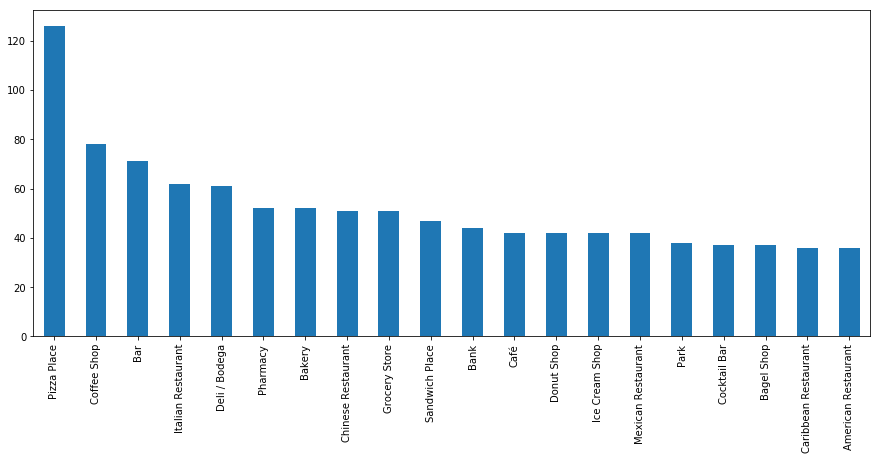

In [157]:
Brooklyn_venues['Venue Category'].value_counts().head(20).plot(kind='bar', figsize=(15, 6))


## 5. Discussion <a name="Discussion"></a>

### 5.1  Cluster Analysis

Examination of the clusters completely indicates **Cluster #3** is best having 10 neighborhoods absent of any coffee shop
competition out of 11 neighborhoods. These neighborhoods have different other restaurants like coffee shop that clearly
indicates that opening a coffee shop will be good decision in these areas. Also, as there is only 1 coffee shop in these
neighborhods there will be not such tough competition with other restaurants and there wll be good profit for the coffee 
shop owner. Cluster 1 has lots of coffee shop and thus it will not be a wise decision to open a coffee shop in this cluster
as the coffee shop owner has to face a tough competition there. Cluster 2 is outlier with only 1 neighborhood.
so we can ignore this cluster


### 5.2  Recommendations

Based on the above analysis we can suggest that Rugby or East Flatbush neighborhoods should be a good choice to
open a coffee shop in one of these areas as most common venues in these are are  Sandwich Place, 
Caribbean Restaurant, Bank, Fried Chicken Joint, Gas Station, Grocery Store, Beach, Mobile Phone Shop, Supermarket, Pharmacy,
Pizza Place, Seafood Restaurant, Food Court and so on. So, as these palces have high demands in these areas, opening a 
coffee shop in any one of these areas should be a good decision as it will not only be a good souce of profit for the
coffee shop owner but also people in these areas do not need to go to another neighborhoods of the 1st cluster to fufill 
their cravings for coffee. They can easliy get it in their own or nearest neighborhoods.

## 6. Conclusions <a name="Conclusions"></a>

The main aim of this project was to find an optimal place to open a coffee shop in Brooklyn, New York city.
Neighborhood data from the Brooklyn was used along with zip code of each neighborhoods. We used location data 
to find the venue data details from Foursquare and calculations using Python code. This base data set was loaded, 
cleaned, and prepared for cluster analysis and other operation. The Folium library was used for map  related visualizations,
and the standard python matplotlib was used for standard graphs.  It was a very interesting project and I really enjoyed a 
lot working on this project.
